# Tanque de 1000L 38x192 (Aplicando Implicita)

 $$
\large f(x)=e^{(A-\frac{1}{x\tau})}+\frac{1}{x}e^{-\frac{B(lnx-ln\mu )}{2\sigma ^{2}}}
 $$   

   

100000


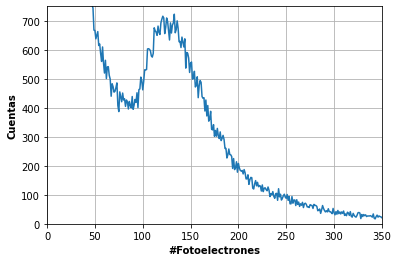

In [1]:
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, fsolve
import pandas as pd
import numpy as np

dataall38x192 = np.loadtxt('histCeren38x192ElecAll.dat')

plt.plot(dataall38x192)
ylim(0, 750)
xlim(0,350)
plt.ylabel("Cuentas", fontweight='bold')
plt.xlabel("#Fotoelectrones" , fontweight='bold')
plt.grid()
print(len(dataall38x192))

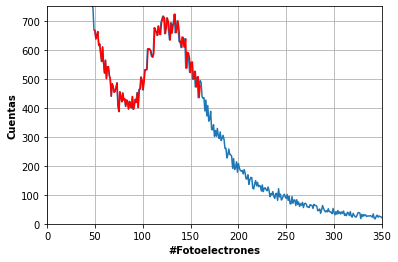

In [4]:
d = np.linspace(0, 500, 501)
d2 = np.linspace(50, 160, 110)
#d2 = np.linspace(95, 160, 65)
#d3 = np.linspace(50, 95, 45)

plt.plot(d, dataall38x192[0:501]) 
plt.plot(d2, dataall38x192[50:160],"r-")
#plt.plot(d2, dataall38x192[95:160],"r-")
#plt.plot(d3, dataall38x192[50:95],"g-")
plt.ylabel("Cuentas", fontweight='bold')
plt.xlabel("#Fotoelectrones" , fontweight='bold')
plt.xlim(0,350)
plt.ylim(0,750)

plt.grid()
plt.show()

 $$
\LARGE f(x)=e^{(A-\frac{1}{x\tau})}+\frac{1}{x}e^{-\frac{B(lnx-ln\mu )}{2\sigma ^{2}}}
 $$ 
 
 donde  $ expo= e^{(A-\frac{1}{x\tau})}$ y $ lognormal=\frac{1}{x}e^{-\frac{B(lnx-ln\mu )}{2\sigma ^{2}}}$

In [7]:
def funcion(x0, par1, par2, par3, par4, par5):
    x = 1./x0
    lognormal = exp(par1)*x*exp(-0.5*pow(((log(x)+ log(par2))*par3),2))
    expo = exp(par4 - par5*x )
    return lognormal+expo;


d3 = np.linspace(50, 159, 110)
#print(d3)
#p1=[1, 1, 1, 1, 1]
p1=[ 10.86884784, 131.83941539,  -5.61313249,   5.13647231, -69.81229876]
popt, pcov = curve_fit(funcion, d3, dataall38x192[50:160], p0=p1)
print(popt)

#print(*popt)

[ 10.86884756 131.83941144  -5.61313593   5.13647333 -69.81223931]


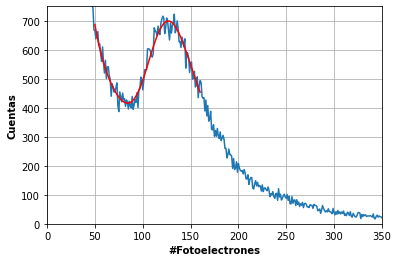

In [8]:
plt.plot(d, dataall38x192[0:501]) 
plt.plot(d2, funcion(d3, *popt), "r-")
plt.xlim(0,350)
plt.ylim(0,750)
#xlim(0,150)
#ylim(0,1000)
plt.ylabel("Cuentas", fontweight='bold')
plt.xlabel("#Fotoelectrones" , fontweight='bold')
plt.grid()
#plt.savefig("Tanque1000LBajo38x192Ajuste[VEM].jpg", dpi=300, bbox_inches='tight')
plt.show()

# Máximos y Mínimos

In [10]:
from sympy import *
from sympy.abc import x
init_printing()

#Donde los valores popt son las constantes encontradas
p2=popt
lognormal = exp(p2[0])*1/x*exp(-0.5*pow(((log(x)+ log(p2[1]))*p2[2]),2))
expo = exp(p2[3] - p2[4]*1/x )
f = expo+lognormal
#print(f)

df = diff(f, x) # Primera derivada
#print(df)
d2f = diff(f, x, 2) # Segunda derivada
pcs = solve(Eq(df,0)) # Puntos críticos
#Son demasiado el proceso a hacer para imprimir tanto d2f y los puntos criticos

def maxminf(f):
    df = diff(f, x) # Primera derivada
    d2f = diff(f, x, 2) # Segunda derivada
    pcs = solve(Eq(df,0)) # Puntos críticos
    print(pcs)
    for i in pcs:
        if d2f.subs(x,i)>0: 
            tipo="Min"
            y=f.subs(x,i)
        elif d2f.subs(x,i)<0: 
            tipo="Max"
            y=f.subs(x,i)
        else: 
            tipo="Indefinido"
        print("x = %f , y = %f (%s)"%(i,y,tipo))




ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\hmpv\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-0896f4ac3567>", line 15, in <module>
    pcs = solve(Eq(df,0)) # Puntos críticos
  File "c:\users\hmpv\appdata\local\programs\python\python36\lib\site-packages\sympy\solvers\solvers.py", line 1095, in solve
    solution = _solve(f[0], *symbols, **flags)
  File "c:\users\hmpv\appdata\local\programs\python\python36\lib\site-packages\sympy\solvers\solvers.py", line 1480, in _solve
    poly = Poly(f_num)
  File "c:\users\hmpv\appdata\local\programs\python\python36\lib\site-packages\sympy\polys\polytools.py", line 164, in __new__
    return cls._from_expr(rep, opt)
  File "c:\users\hmpv\appdata\local\programs\python\python36\lib\site-packages\sympy\polys\polytools.py", line 294, in _from_expr
    return cls._from_dict(rep, opt)
  File "c:\user

TypeError: object of type 'NoneType' has no len()